In [21]:
import time
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from mpl_toolkits.mplot3d import Axes3D
import ipympl
import seaborn as sns
import graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.tree import export_graphviz

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

plt.rcParams["axes.grid"] = True

In [22]:
df = pd.read_csv('data.csv', index_col=None, sep=",")
df

,name,followers,followings,follow ratio,muters,reputation,effective sp,own sp,sp ratio,curation_rewards,posting_rewards,witnesses_voted_for,posts,average_post_len,comments,average_comment_len,comments_with_link_ratio,posts_to_comments_ratio,class
0,fuadmaulana,198,24,0.121212,0,38.989583,5.284369e+00,4.281840,1.234135,0.005,4.482,1,0,0,0,0,0.000000,0.000000,0
1,ltfbyz,58,31,0.534483,0,42.413591,5.036458e+00,3.319924,1.517040,0.011,5.517,0,0,0,0,0,0.000000,0.000000,0
2,papanero,460,191,0.415217,1,60.422207,2.544272e+02,254.427160,1.000000,9.631,631.063,0,88,388,141,29,0.000000,0.624113,0
3,pialejoana,356,10,0.028090,0,62.886618,4.842809e+02,559.384713,0.865739,5.795,1103.086,2,88,2130,1896,379,0.704641,0.046414,0
4,adarshagni,700,63,0.090000,1,50.389773,1.764393e+01,17.643934,1.000000,0.001,38.989,0,12,1332,4,29,0.000000,3.000000,0
5,pialejoana,356,10,0.028090,0,62.886618,4.842809e+02,559.384713,0.865739,5.795,1103.086,2,88,2130,1896,379,0.704641,0.046414,0
6,uniqueknowledge,226,81,0.358407,0,47.467298,6.048809e+00,5.039767,1.200216,0.075,25.270,7,0,0,1,8,0.000000,0.000000,0
7,jesusdiazmaica,190,7,0.036842,0,44.728395,1.507994e+01,5.795509,2.602004,0.000,11.325,0,2,337,0,0,0.000000,0.000000,0
8,playfulfoodie,3820,537,0.140576,15,68.458364,7.460440e+03,7460.440015,1.000000,765.094,8592.788,17,46,4924,181,270,0.022099,0.254144,0
9,wakjal12,152,38,0.250000,0,29.419235,5.026567e+00,0.622860,8.070144,0.009,0.252,0,0,0,0,0,0.000000,0.000000,0


In [23]:
columns = ['followers', 'followings', 'follow ratio', 'muters',
           'reputation', 'effective sp', 'own sp', 'sp ratio', 'curation_rewards',
          'posting_rewards', 'witnesses_voted_for', 'posts', 'average_post_len', 'comments',
          'average_comment_len', 'comments_with_link_ratio', 'posts_to_comments_ratio']

In [24]:
df1 = df

for column in columns:
    # calculate quantile (we want to remove 4% of the outliers)
    quantile = df[column].quantile(0.96)
    # filter column
    df1 = df1[df1[column] < quantile]

def color(r, g, b):
    return (r/255, g/255, b/255)

def label(c):
    return Line2D([0],[0], linestyle="none", c=c, marker = 'o')

def scatter_plot_3d(d, x, y, z):
    fig = plt.figure(figsize=(8, 8))
    ax = Axes3D(fig)
    ax.scatter(d[x], d[y], d[z], c=d['class'], cmap=plt.cm.Accent, edgecolor='k', s=80)
    ax.set_xlabel(x)
    ax.set_ylabel(y)
    ax.set_zlabel(z)
    ax.legend([label(color(150, 210, 150)), label(color(247, 192, 135)),
               label(color(235, 8, 144)), label(color(102, 102, 102))],
              ['content-creator', 'scammer', 'comment-spammer', 'bid-bot'], numpoints = 1)

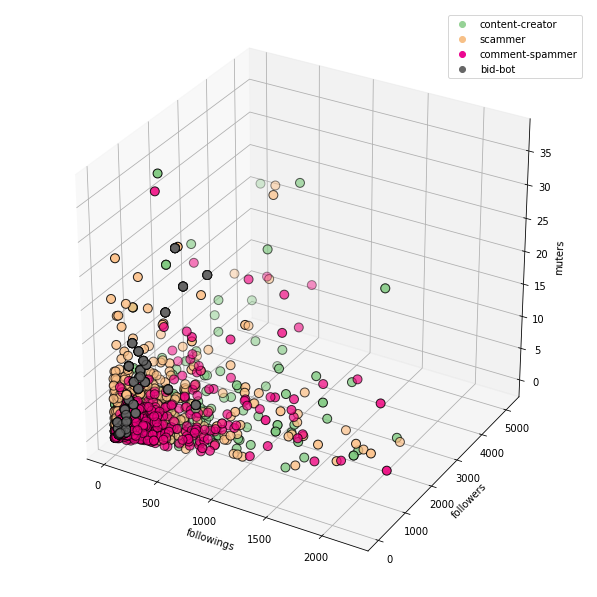

In [25]:
scatter_plot_3d(df1, 'followings', 'followers', 'muters')

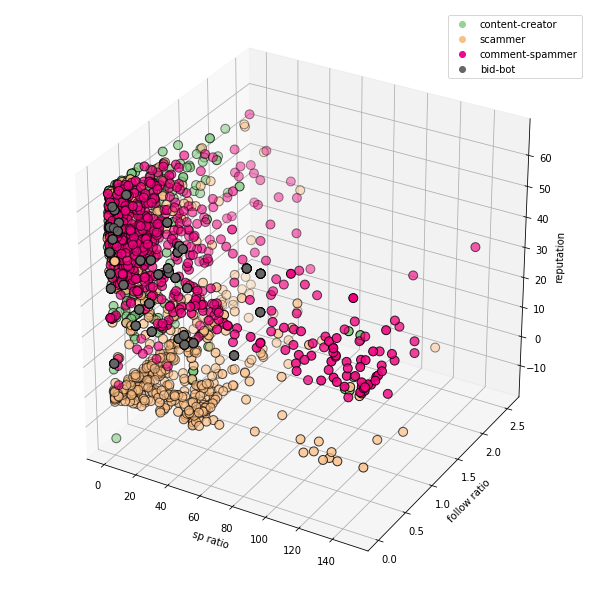

In [26]:
scatter_plot_3d(df1, 'sp ratio', 'follow ratio', 'reputation')

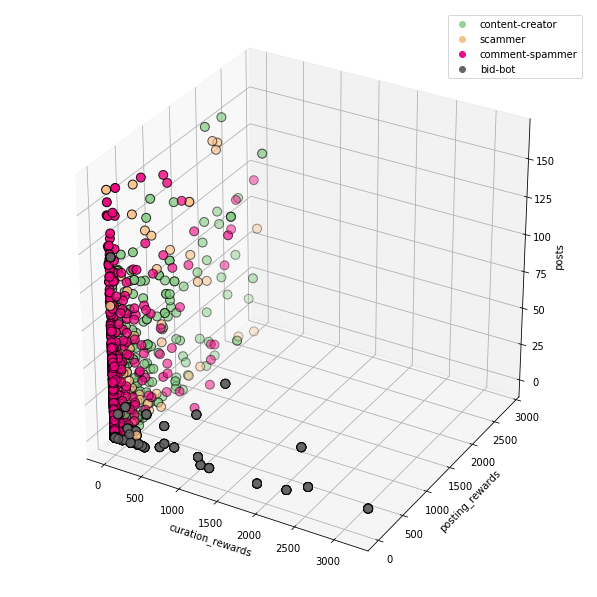

In [27]:
scatter_plot_3d(df1, 'curation_rewards', 'posting_rewards', 'posts')

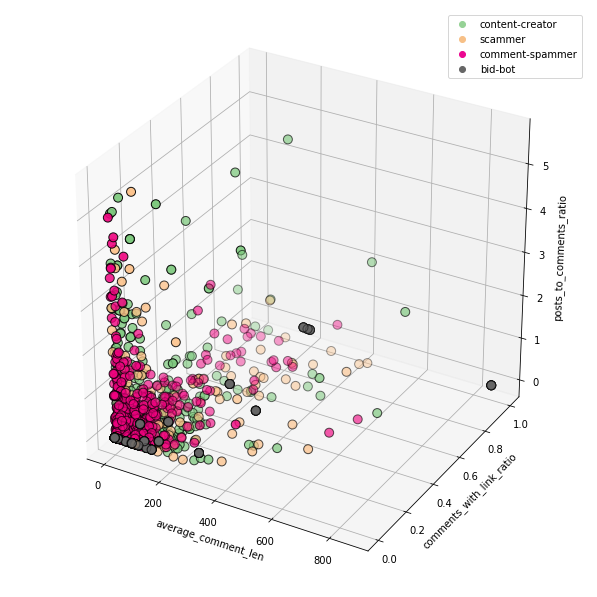

In [28]:
scatter_plot_3d(df1, 'average_comment_len', 'comments_with_link_ratio', 'posts_to_comments_ratio')

In [29]:
class_names = ['content-creator', 'scammer', 'comment-spammer', 'bid-bot']

def plot_confusion_matrix(cm):
    plt.figure(figsize = (8, 8))
    sns.heatmap(cm,
                annot=True,
                cmap="Greens",
                xticklabels=class_names,
                yticklabels=class_names,
                fmt = '0.0f')

   DecisionTreeClassifier - accuracy: 0.945, execution time: 0.025 ms
        BaggingClassifier - accuracy: 0.950, execution time: 0.083 ms
   RandomForestClassifier - accuracy: 0.959, execution time: 0.073 ms
     ExtraTreesClassifier - accuracy: 0.884, execution time: 0.035 ms
                 AdaBoost - accuracy: 0.767, execution time: 0.761 ms
     GradientTreeBoosting - accuracy: 0.974, execution time: 0.621 ms


'RandomForestClassifier.png'

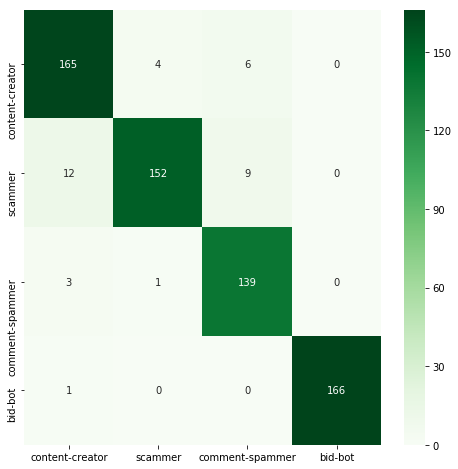

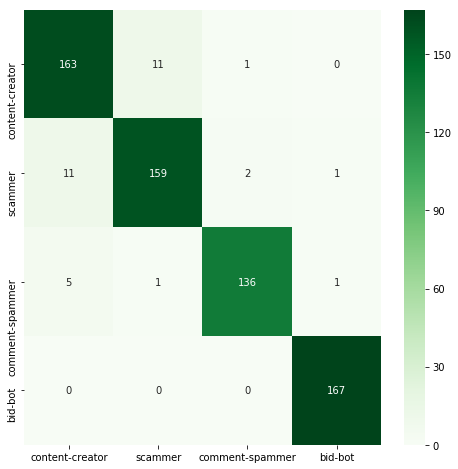

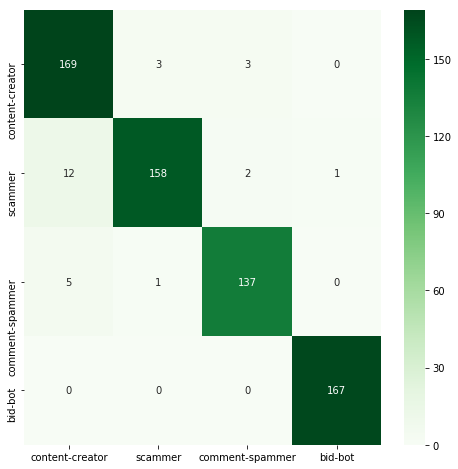

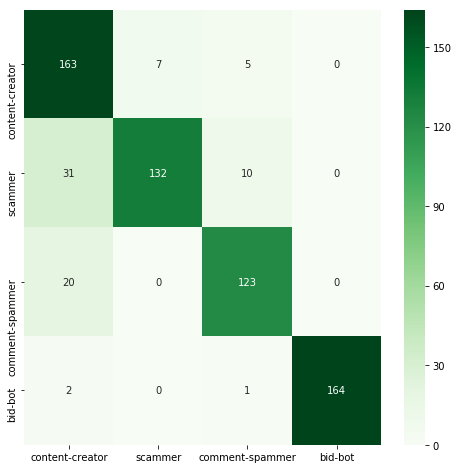

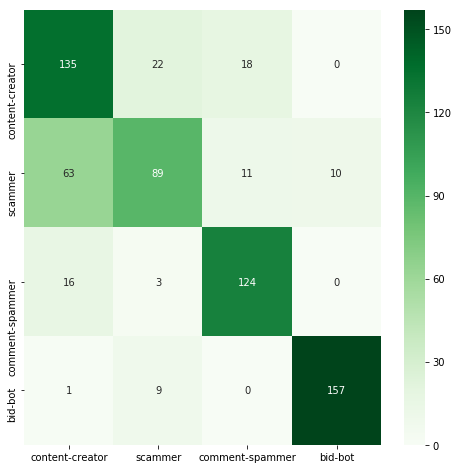

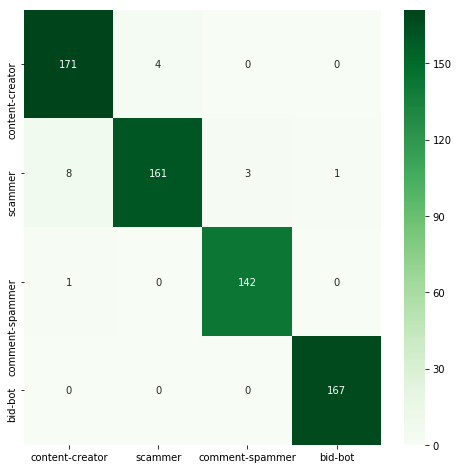

In [32]:
X_cols = columns
y_cols = ['class']
X = df[X_cols]
y = df[y_cols]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# convert from pandas dataframe to plain array
y_train = np.array(y_train).ravel()
y_test = np.array(y_test).ravel()

# used classifiers: Decision tree for reference + ensemble methods
classifiers = [
    ('DecisionTreeClassifier', DecisionTreeClassifier(max_depth=8, random_state=0)), 
    ('BaggingClassifier', BaggingClassifier(DecisionTreeClassifier(max_depth=10), max_samples=0.5, max_features=0.5)),
    ('RandomForestClassifier', RandomForestClassifier(max_depth = 8, n_estimators=10)),
    ('ExtraTreesClassifier', ExtraTreesClassifier(max_depth = 10, n_estimators=10, min_samples_split=2, random_state=0)),
    ('AdaBoost', AdaBoostClassifier(n_estimators=100)),
    ('GradientTreeBoosting', GradientBoostingClassifier(n_estimators=60, learning_rate=1.0, max_depth=1, random_state=0))
]

# iterate over classifiers
for clf_name, clf in classifiers:
    start = time.time()
    clf.fit(X_train, y_train)
    score = clf.fit(X_test, y_test)
    y_pred = clf.predict(X_test)
    end = time.time()
    print('%25s - accuracy: %.3f, execution time: %.3f ms' % 
          (clf_name, accuracy_score(y_pred, y_test), end - start))
    cm = confusion_matrix(y_test, y_pred)
    plot_confusion_matrix(cm)
    
graph = graphviz.Source(export_graphviz(
    classifiers[2][1].estimators_[0],
    out_file=None,
    feature_names=X_cols,
    class_names=class_names,
    filled=True,
    rounded=True))

graph.format = 'png'
graph.render('RandomForestClassifier')